In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200513_NOT_v4.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200513_NOT

## Si II 6355

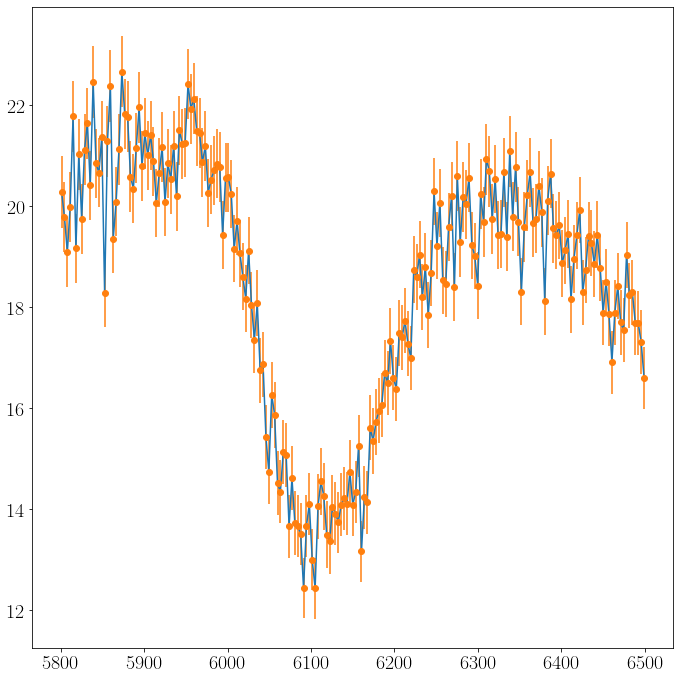

In [5]:
Spec1.plot_line_region(5800, 6500)

In [6]:
Spec1.add_line('SiII_6355', 5900, 6350, lines=[6371.359, 6347.103])

130 points within 5900.00 and 6350.00 angstroms.


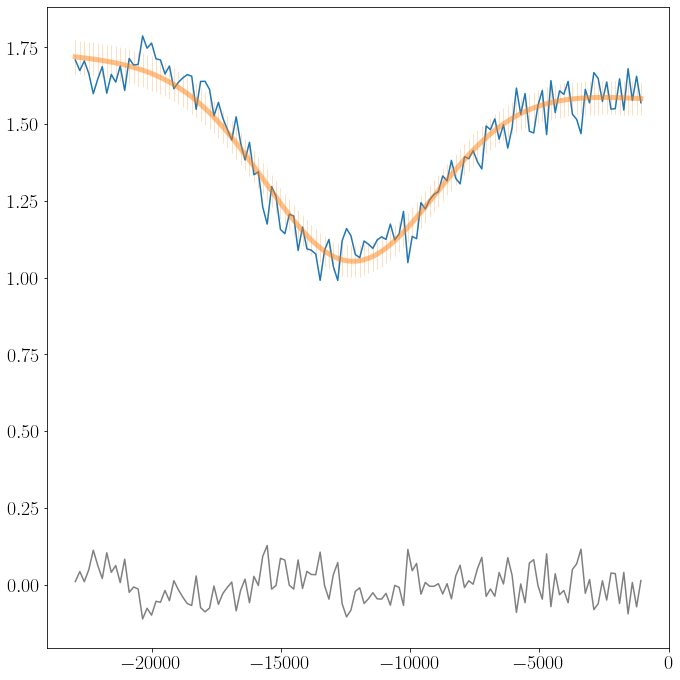

[ 1.58448780e+00  1.72252169e+00 -1.17507925e+04  1.61622268e+01
 -2.47714004e+03]


In [7]:
Spec1.line['SiII_6355'].LS_estimator()

100%|██████████| 1500/1500 [00:24<00:00, 61.85it/s] 


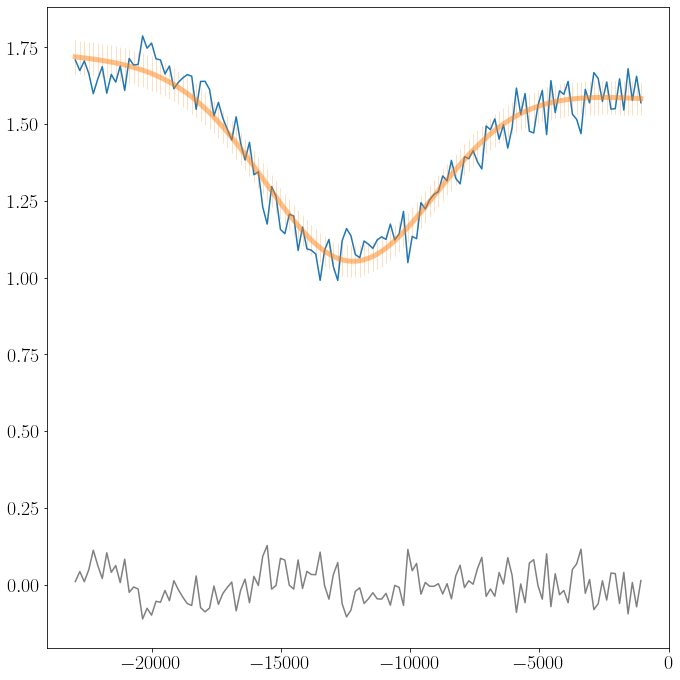

Velocity pvf: -11733 pm 79 km/s


In [8]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler()

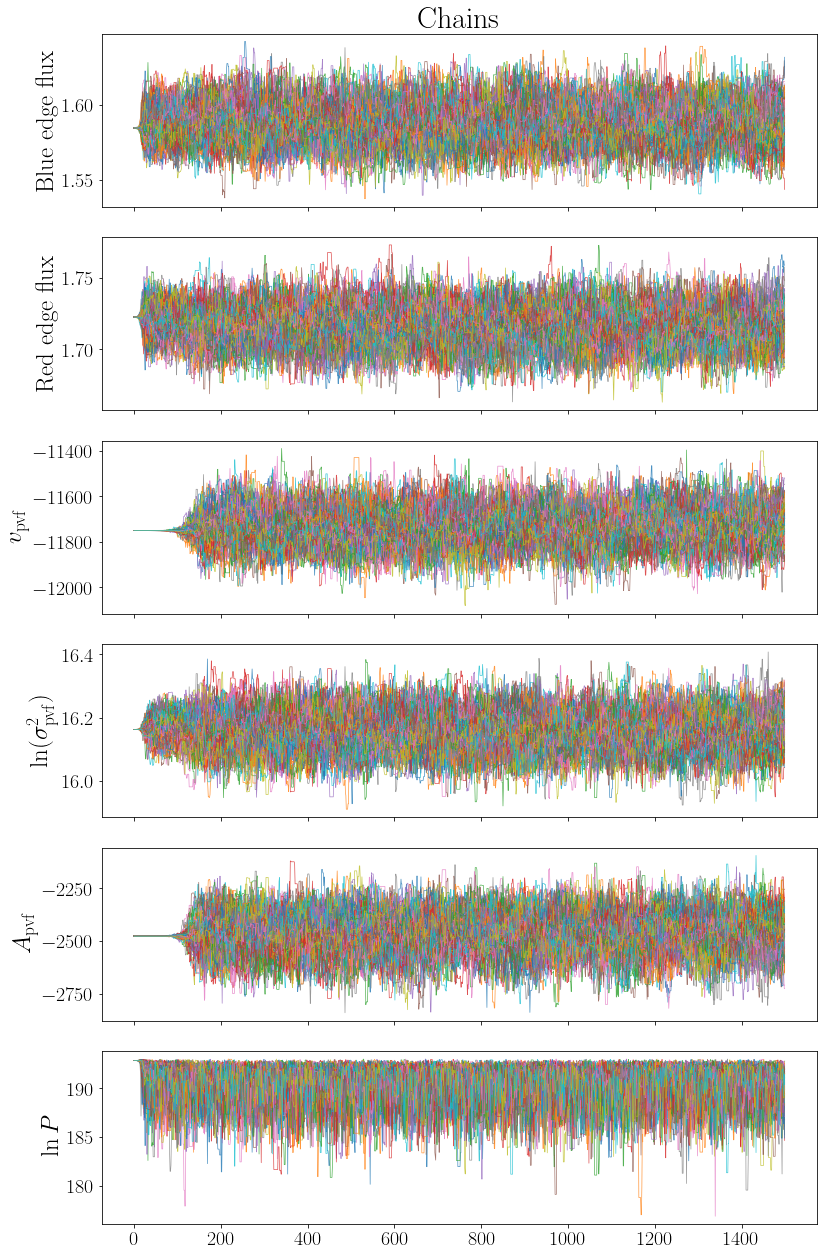

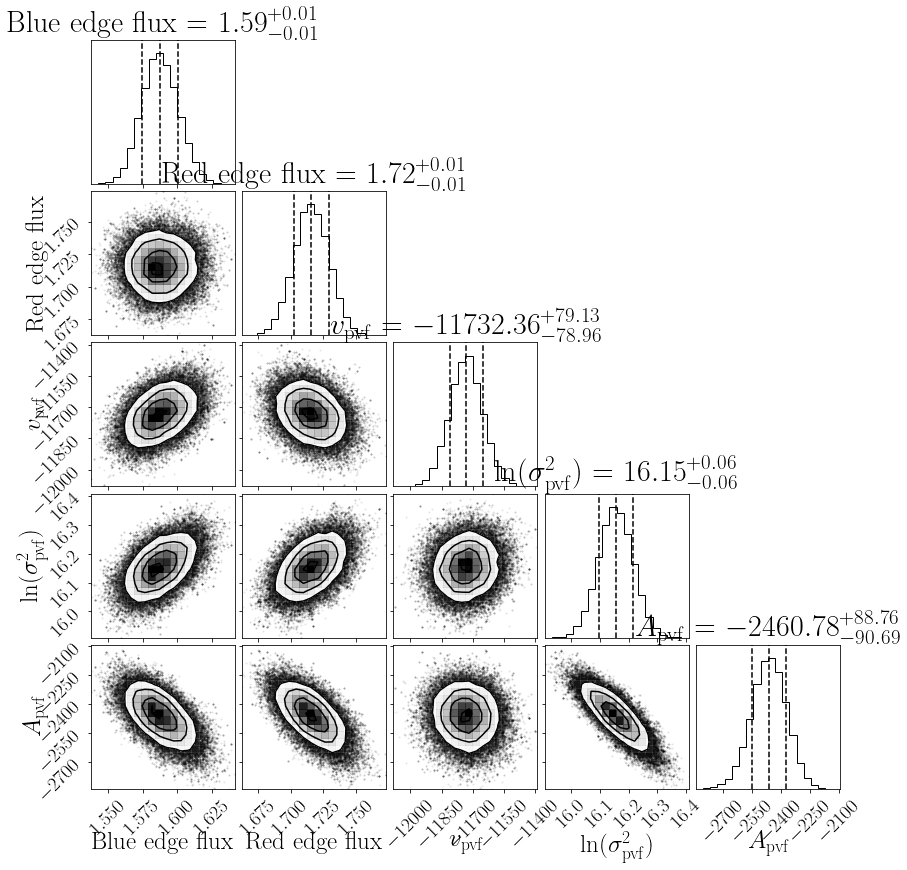

In [9]:
vel.plot_MCMC(sampler, 200)

## Ca II IRT

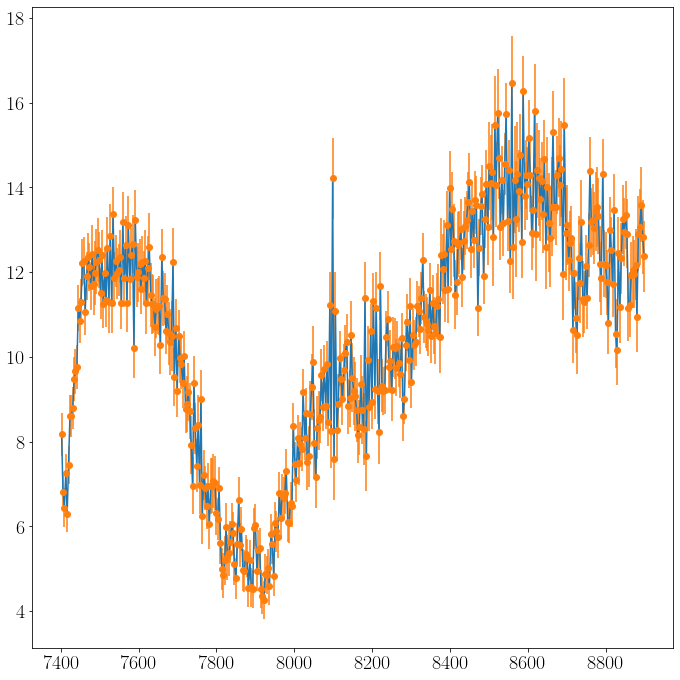

In [10]:
Spec1.plot_line_region(7400, 8900)

In [11]:
Spec1.add_line('CaII_IRT', 7600, 8600, lines=[8498.018, 8542.089, 8662.140])

277 points within 7600.00 and 8600.00 angstroms.


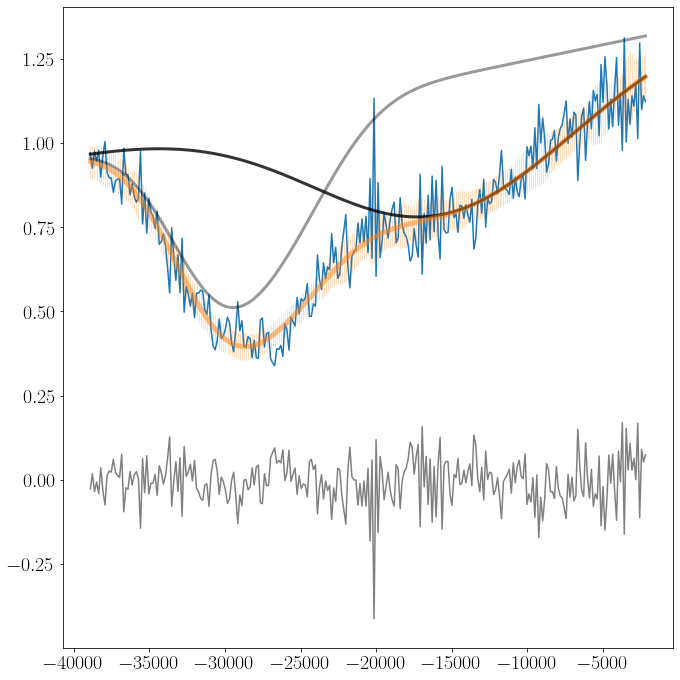

[ 1.31820345e+00  9.75470267e-01 -1.22084433e+04  1.80262969e+01
 -2.89966261e+03 -2.53564545e+04  1.62797558e+01 -1.99468935e+03]


In [12]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

100%|██████████| 1500/1500 [00:48<00:00, 30.99it/s]


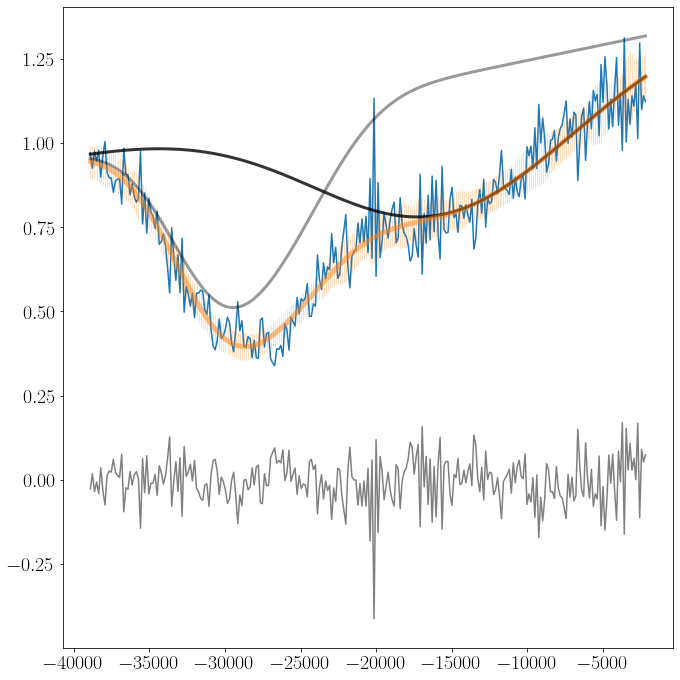

Velocity pvf: -11676 pm 74 km/s
Velocity hvf: -24672 pm 119 km/s


In [13]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              nburn=500)

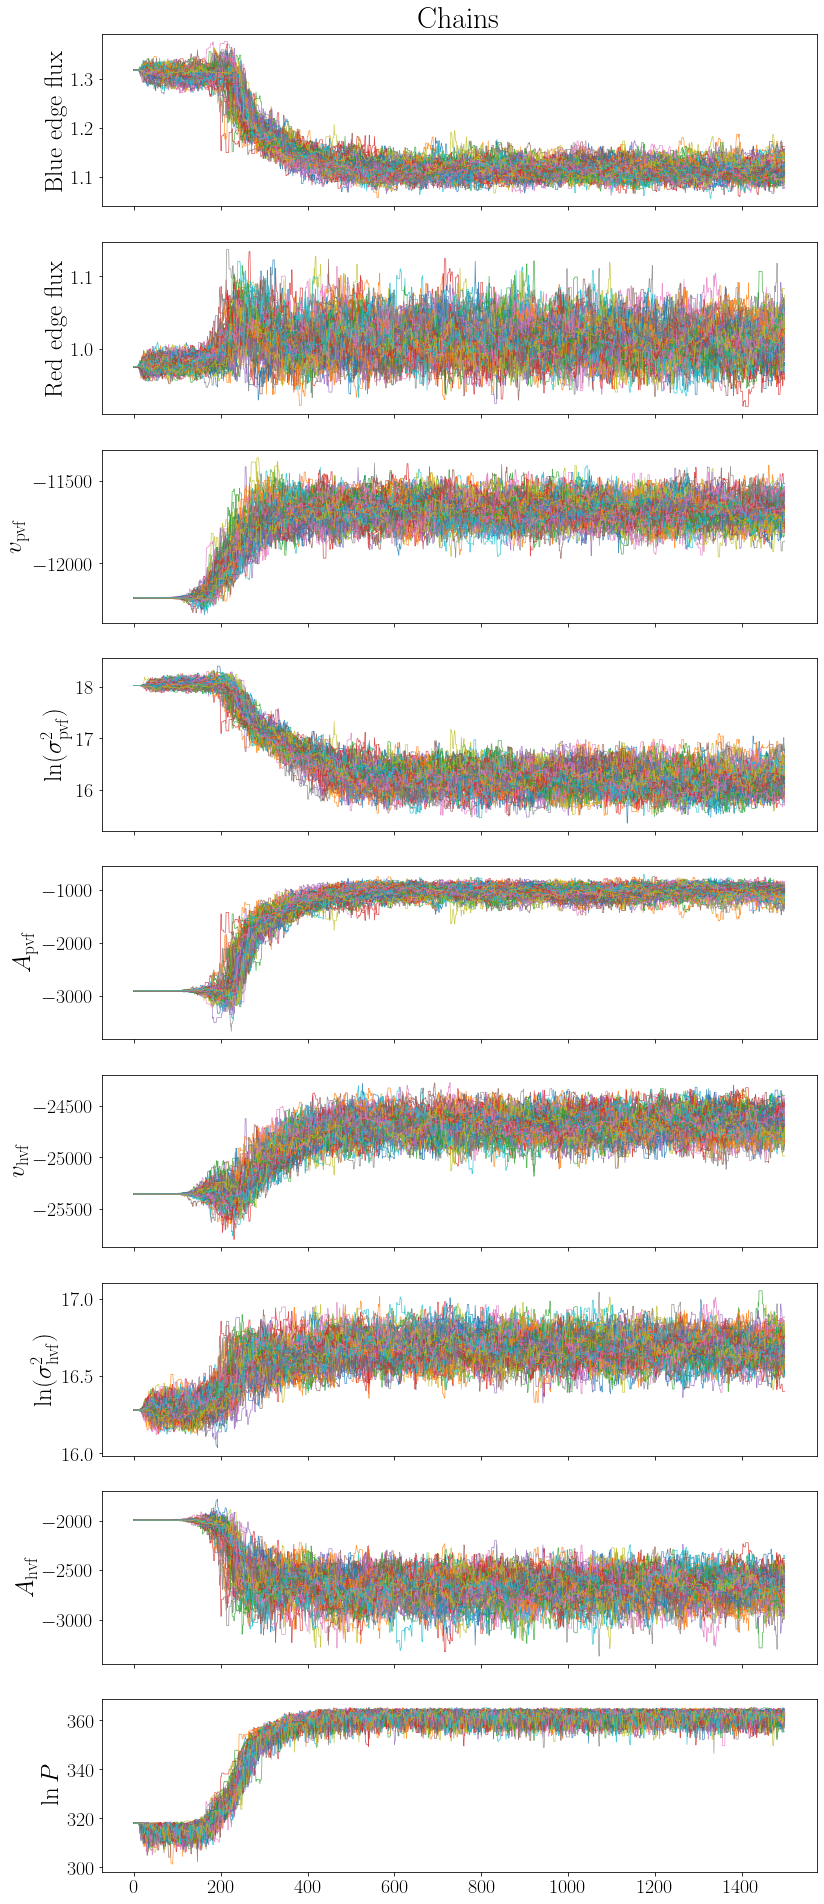

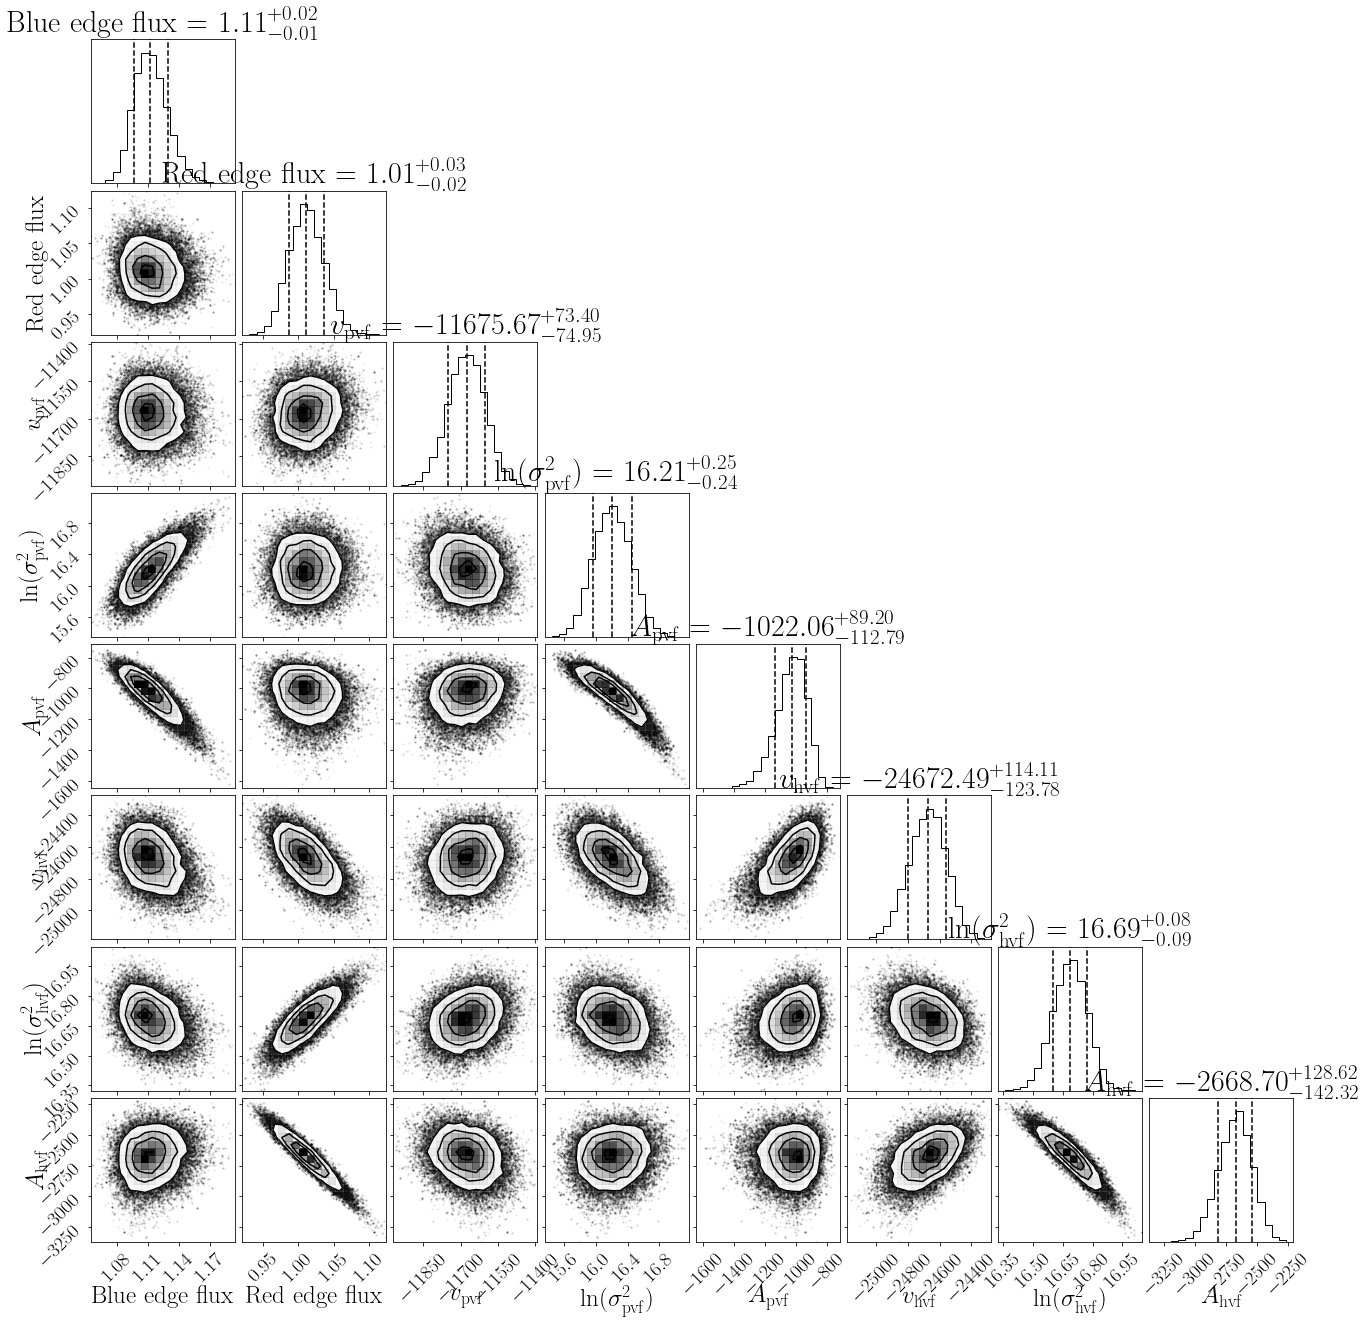

In [14]:
vel.plot_MCMC(sampler, 500)